Dataset: Digits 
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

My aim is to build logistics regression model on training which will be able to differantete if digits on picture are larger that 4 or not 

# Importing libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

%matplotlib inline

In [2]:
digits = load_digits()

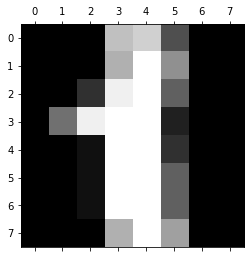

In [3]:
plt.matshow(digits.images[1], cmap = 'gray')
plt.show()

### Zadanie 1: małe cyfry vs duże

Dla danych digits zbuduj model regresji logistycznej rozróżniającej małe cyfry od dużych:

1. Oddziel zbiór testowy

2. Przeskaluj dane i policz średnią dokładność za pomocą kroswalidacji dla modeli:

    regresja grzbietowa, C = 1, 0.1, 0.01
    
    regresja LASSO, C = 1, 0.1, 0.01
    
3. Porównaj wyniki, wybierz najlepszy model i policz dokładność i miarę F1 dla zbioru testowego.
    

In [4]:
# Data load and check of their shape

In [5]:
digits = load_digits()

In [6]:
X = digits.data
y = digits.target

In [7]:
y = (y > 4).astype(int)

In [8]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [9]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [10]:
# Division of data set on training set and test set

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 17)

In [ ]:
# Data scalling and fitting

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(X_train)

StandardScaler()

In [14]:
X_train_scaled = scaler.transform(X_train)

In [15]:
X_test_scaled = scaler.transform(X_test)

In [16]:
modelLR = LogisticRegression()


In [17]:
modelLR.fit(X_train_scaled, y_train)

LogisticRegression()

In [18]:
# Train of scalled and fitted model 

In [19]:
modelLR.score(X_train_scaled, y_train)

0.9123979213066072

In [20]:
modelLR.score(X_test_scaled, y_test)

0.8888888888888888

In [21]:
# Score received for scalled and fitted model on train set: 0.8888888888888888, I check if using other methods it's possible to get better results

In [22]:
#Building the pipeline, with the same methods, but to use it for crossvalidation

In [23]:
model_pipe_Scaller_LR = Pipeline([("standarization", StandardScaler()),("LogisticRegression", LogisticRegression())])

In [24]:
model_pipe_Scaller_LR.fit(X_train, y_train)

Pipeline(steps=[('standarization', StandardScaler()),
                ('LogisticRegression', LogisticRegression())])

In [25]:
model_pipe_Scaller_LR.score(X_test, y_test)

0.8888888888888888

In [26]:
#Check of results for a model with cross-validation

In [27]:
CV_score = cross_val_score(model_pipe_Scaller_LR, X, y, cv = 10)

In [28]:
CV_score

array([0.8       , 0.91111111, 0.9       , 0.9       , 0.88333333,
       0.93888889, 0.93888889, 0.8603352 , 0.84357542, 0.82122905])

In [29]:
CV_score.mean()

0.8797361887026691

In [30]:
# Model training and validation for ridge regretion, C = 1, 0.1, 0.01

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 17)

In [32]:
kfold = StratifiedKFold(n_splits = 10)

In [33]:
model1 = Pipeline([("standarization", StandardScaler()),("LogisticRegression", LogisticRegression(C = 1, penalty = "l2", solver = "liblinear"))])

In [34]:
CV_score1 = cross_val_score(model1, X_train, y_train, cv = kfold)

In [35]:
CV_score1

array([0.9037037 , 0.91111111, 0.87407407, 0.88888889, 0.88888889,
       0.87407407, 0.91851852, 0.92537313, 0.85820896, 0.87313433])

In [36]:
CV_score1.mean()

0.8915975677169706

In [37]:
model2 = Pipeline([("standarization", StandardScaler()),("LogisticRegression", LogisticRegression(C = 1/10, penalty = "l2", solver = "liblinear"))])

In [38]:
CV_score2 = cross_val_score(model2, X_train, y_train, cv = kfold)

In [39]:
CV_score2

array([0.91111111, 0.8962963 , 0.88148148, 0.87407407, 0.9037037 ,
       0.87407407, 0.93333333, 0.93283582, 0.86567164, 0.8880597 ])

In [40]:
CV_score2.mean()

0.8960641238253177

In [41]:
model3 = Pipeline([("standarization", StandardScaler()),("LogisticRegression", LogisticRegression(C = 1/100, penalty = "l2", solver = "liblinear"))])

In [42]:
CV_score3 = cross_val_score(model3, X_train, y_train, cv = kfold)

In [43]:
CV_score3

array([0.91851852, 0.9037037 , 0.85925926, 0.88148148, 0.86666667,
       0.87407407, 0.9037037 , 0.91044776, 0.87313433, 0.88059701])

In [44]:
CV_score3.mean()

0.8871586511885019

In [45]:
# Model training and validation for LASSO regretion, C = 1, 0.1, 0.01

In [46]:
model1_lasso = Pipeline([("standarization", StandardScaler()),("LogisticRegression", LogisticRegression(C = 1, penalty = "l1", solver = "liblinear"))])

In [47]:
CV_score_lasso1 = cross_val_score(model1_lasso, X_train, y_train, cv = kfold)

In [48]:
CV_score_lasso1

array([0.91111111, 0.9037037 , 0.87407407, 0.88148148, 0.8962963 ,
       0.87407407, 0.91851852, 0.92537313, 0.85820896, 0.8880597 ])

In [49]:
CV_score_lasso1.mean()

0.8930901050304035

In [50]:
model2_lasso = Pipeline([("standarization", StandardScaler()),("LogisticRegression", LogisticRegression(C = 1/10, penalty = "l1", solver = "liblinear"))])

In [51]:
CV_score_lasso2 = cross_val_score(model2_lasso, X_train, y_train, cv = kfold)

In [52]:
CV_score_lasso2

array([0.91851852, 0.86666667, 0.88888889, 0.87407407, 0.9037037 ,
       0.85925926, 0.8962963 , 0.91044776, 0.86567164, 0.89552239])

In [53]:
CV_score_lasso2.mean()

0.8879049198452185

In [54]:
model3_lasso = Pipeline([("standarization", StandardScaler()),("LogisticRegression", LogisticRegression(C = 1/100, penalty = "l1", solver = "liblinear"))])

In [55]:
CV_score_lasso3 = cross_val_score(model3_lasso, X_train, y_train, cv = kfold)

In [56]:
CV_score_lasso3

array([0.87407407, 0.80740741, 0.83703704, 0.88148148, 0.88148148,
       0.86666667, 0.82222222, 0.82089552, 0.84328358, 0.76119403])

In [57]:
CV_score_lasso3.mean()

0.8395743504698728

In [58]:
# The model that was subject to scalling and ridge regretion turned out to be the best with C = 0.1

In [59]:
model_fin = Pipeline([("standarization", StandardScaler()),("LogisticRegression", LogisticRegression(C = 1/10, penalty = "l2", solver = "liblinear"))])

In [60]:
model_fin.fit(X_train, y_train)

Pipeline(steps=[('standarization', StandardScaler()),
                ('LogisticRegression',
                 LogisticRegression(C=0.1, solver='liblinear'))])

In [61]:
model_fin.score(X_train, y_train)

0.9123979213066072

In [62]:
model_fin.score(X_test, y_test)

0.8822222222222222

In [63]:
#Drawing a matrix of mistakes, to check how many positive and false positive results there were

In [64]:
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

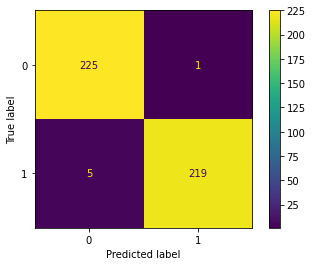

In [65]:
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=clf.classes_);
disp.plot()
